In [ ]:
#For Local interpretability methods
#This file is to get top 5 features for all programs. It creates a dataframe with 5 rows and columns (number of colums are equal to number of methods)
#This file gets the result files per program (every program result file contains results for 150 observations and 29 features),it then processes every program's results and gets top 5 features.
#It then calculates the correlation matrix based on intersction between two program's top 5 features.
#Lastly creates the heatmap based on correlation matrix

### Fraud - Get Top 5 features for all the programs for 150 fraud observationsin matrix (one column per program)

In [1]:
import os
import pandas as pd
import numpy as np
import pickle

Xtr = pickle.load(open('./Data/pickledtraintestdata/X_train.pkl', 'rb'))
col = Xtr.columns
n = pd.DataFrame(data= col, columns = ['Variables'])
unfeatures2 = n.Variables.unique()

R1 = pd.DataFrame()
R2 = pd.DataFrame()
R3 = pd.DataFrame()

pathName = "./NormalizedWeights/Fraud"
#outputPath = "./ExtraResultfiles/Fraud"

fileNames = os.listdir(pathName)

numFiles = []
for fileNames in fileNames:
    if fileNames.endswith(".csv"):
        numFiles.append(fileNames)

print(numFiles)
for i in numFiles:
    firstfour = i[:4]

    dataperprogram = pd.read_csv(pathName+ '/'+str(i),sep=',')

    df = dataperprogram[dataperprogram.columns[::2]]
    df1 = df.stack().reset_index()
    
    df2 = dataperprogram.iloc[:, 1::2]
    df2 = df2.stack().reset_index()
    
    combined_df = pd.concat([df1[[0]] , df2[[0]]], axis =1)
    
    combined_df.rename(columns = {'0':'Feature', '0':'Weight'}, inplace = True)

    combined_df.columns = ["AllFeatures", "AllWeights"]
    combined_df['AllFeatures'] = combined_df['AllFeatures'].str.strip()
    
    unfeatures = combined_df.AllFeatures.unique()
    
    unqvar = list(set(unfeatures2) - set(unfeatures))

    column_names = ["Feature", "AvgWeight"]
    storePerVar = pd.DataFrame(columns = column_names)
    
    for x in unfeatures:
        xsum = np.sum(combined_df.loc[combined_df['AllFeatures'] == x, 'AllWeights'])
        xlen = len(combined_df.loc[combined_df['AllFeatures'] == x , 'AllWeights'])
        xavg = xsum/xlen 
        row = [{'Feature': x,'AvgWeight': xavg}]
        storePerVar = storePerVar.append(row)    
        
    for y in unqvar:
        xavg = 0
        row = [{'Feature': y,'AvgWeight': xavg}]
        storePerVar = storePerVar.append(row)
        
    storePerVar.sort_values(by=['AvgWeight'], inplace=True, ascending = False)
    R1 = pd.concat([R1, storePerVar], axis=1)
    
    top5 = storePerVar.head(5)    
    R2 = pd.concat([R2, top5], axis=1)
    
    top5perprogram = top5.iloc[:,0]
    p = pd.DataFrame(top5perprogram)
    
    p.rename(columns = {'Feature': str(firstfour)}, inplace = True)
    R3 = pd.concat([R3, p], axis=1)
    
R3.to_csv('./Finaltop5ofAllPrograms_150fraud.csv', index=False, header = True, sep = ",")
print(R3)


newdffd = R3[['pyCP','Eli5','LIME','TREE','pyBu','SHAP','VIVO', 'pyBD', 'piBr']]
newdffraudd= pd.DataFrame(newdffd)
newdffraudd.rename(columns = {'Eli5':'Eli5', 'VIVO':'Vivo', 'pyBD':'pyBreakdown(down)', 'LIME':'Lime', 'pyCP':'pyCeterisParibus','TREE':'Treeinterpreter'
                              ,'SHAP':'Shap','piBr':'piBreakdown','pyBu':'pyBreakdown(up)'}, inplace = True) 
print(newdffraudd)

['Eli5_NORM_ALL_NORM_fraud.csv', 'VIVO_ALL_NORM_fraud.csv', 'pyBDown_ALL_NORM_fraud.csv', 'LIME_ALL_NORM_fraud.csv', 'pyCP_ALL_NORM_fraud.csv', 'TREEINTER_ALL_NORM_fraud.csv', 'piBreakdown_ALL_NORM_fraud.csv', 'SHAP_ALL_NORM_fraud.csv', 'pyBup_ALL_NORM_fraud.csv']
  Eli5    VIVO pyBD LIME pyCP TREE piBr SHAP pyBu
0  V14     V14  V11  V14  V14  V14   V3  V14   V4
0  V10     V12   V4   V4  V12  V10  V12  V10  V14
0  V12     V10  V14  V12  V10  V12  V11  V12  V11
0   V4     V17  V17  V10   V4   V4  V10   V4  V12
0  V11  Amount   V3  V11   V3  V11  V16  V17  V10
  pyCeterisParibus Eli5 Lime Treeinterpreter pyBreakdown(up) Shap    Vivo  \
0              V14  V14  V14             V14              V4  V14     V14   
0              V12  V10   V4             V10             V14  V10     V12   
0              V10  V12  V12             V12             V11  V12     V10   
0               V4   V4  V10              V4             V12   V4     V17   
0               V3  V11  V11             V11      

### Fraud - Create Correaltion matrix and heatmap

  pyCeterisParibus Eli5 Lime Treeinterpreter pyBreakdown(up) Shap    Vivo  \
0              V14  V14  V14             V14              V4  V14     V14   
0              V12  V10   V4             V10             V14  V10     V12   
0              V10  V12  V12             V12             V11  V12     V10   
0               V4   V4  V10              V4             V12   V4     V17   
0               V3  V11  V11             V11             V10  V17  Amount   

  pyBreakdown(down) piBreakdown  
0               V11          V3  
0                V4         V12  
0               V14         V11  
0               V17         V10  
0                V3         V16  
                   pyCeterisParibus   Eli5   Lime  Treeinterpreter  \
ind                                                                  
pyCeterisParibus                1.0   80.0   80.0             80.0   
Eli5                           80.0    1.0  100.0            100.0   
Lime                           80.0  100.0    1.0    

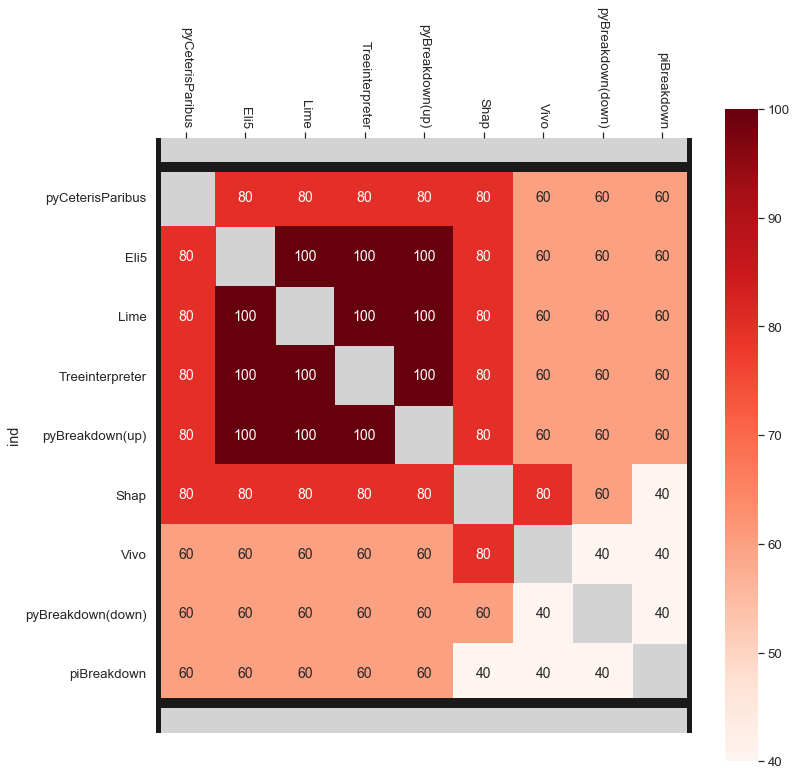

In [2]:

new_data = newdffraudd
cols = new_data.columns

print(new_data)

newdf1 = pd.DataFrame(columns = cols)
#newdf1['ind'] = s_cols
newdf1['ind'] = cols
newdf7 = newdf1.set_index('ind')


#for i in range(0,len(new_data.columns)):
for i in range(0,len(new_data.columns)):
    inner = new_data.columns[i+1:]
    if len(inner) != 0:
        for j in range(i+1,len(new_data.columns)):        
            intersect = len(pd.Index(new_data[new_data.columns[i]]).intersection(pd.Index(new_data[new_data.columns[j]])))
            perc = (intersect*100)/5
            newdf7[str(new_data.columns[j])][str(new_data.columns[i])] = perc
            newdf7[str(new_data.columns[i])][str(new_data.columns[j])] = perc

            
        for k in range(len(new_data.columns[:-1])):
            intersect = len(pd.Index(new_data[new_data.columns[i]]).intersection(pd.Index(new_data[new_data.columns[j]])))
            perc = int((intersect*100)/5)
            newdf7[str(new_data.columns[j])][str(new_data.columns[i])] = perc
            newdf7[str(new_data.columns[i])][str(new_data.columns[j])] = perc
               

newdf7 = newdf7.fillna(1)
newdf7.astype('int64')
print(newdf7)


import seaborn as sn
import matplotlib.pyplot as plt

sn.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,12))
ax.set_facecolor("lightgrey")
sn.heatmap(newdf7,annot=True, square=True, ax=ax,robust=True, cmap ="Reds", annot_kws={"fontsize":14},fmt='g',mask=newdf7== 1)
ax.xaxis.set_ticks_position('top')
plt.setp(ax.get_yticklabels(), rotation=360)

ax.axhline(y=0, color='k',linewidth=10)
ax.axhline(y=newdf7.shape[1], color='k',linewidth=10)
ax.axvline(x=0, color='k',linewidth=10)
ax.axvline(x=newdf7.shape[0], color='k',linewidth=10)
b, t = plt.ylim()
b += 0.5
t -= 0.5 
plt.ylim(b, t)
plt.xticks(rotation=270)
plt.savefig('Heatmap_fraud_localmethods_150instances.png')
plt.show()



### NonFraud - Get Top 5 features for all the programs for 150 non fraud observations in matrix (one column per program)

In [66]:
import os
import pandas as pd
import numpy as np
import pickle

Xtr = pickle.load(open('./Data/pickledtraintestdata/X_train.pkl', 'rb'))
col = Xtr.columns
n = pd.DataFrame(data= col, columns = ['Variables'])
unfeatures2 = n.Variables.unique()

R1 = pd.DataFrame()
R2 = pd.DataFrame()
R3 = pd.DataFrame()

#pathName = os.getcwd()


pathName = "./NormalizedWeights/NonFraud"
#outputPath = "./ExtraResultfiles/NonFraud"

fileNames = os.listdir(pathName)

numFiles = []
for fileNames in fileNames:
    if fileNames.endswith(".csv"):
        numFiles.append(fileNames)

print(numFiles)
for i in numFiles:
    firstfour = i[:4]

    dataperprogram = pd.read_csv(pathName+ '/'+str(i),sep=',')

    df = dataperprogram[dataperprogram.columns[::2]]
    df1 = df.stack().reset_index()
    
    df2 = dataperprogram.iloc[:, 1::2]
    df2 = df2.stack().reset_index()
    
    combined_df = pd.concat([df1[[0]] , df2[[0]]], axis =1)
    
    combined_df.rename(columns = {'0':'Feature', '0':'Weight'}, inplace = True)

    combined_df.columns = ["AllFeatures", "AllWeights"]
    combined_df['AllFeatures'] = combined_df['AllFeatures'].str.strip()
    
    unfeatures = combined_df.AllFeatures.unique()
    
    unqvar = list(set(unfeatures2) - set(unfeatures))

    column_names = ["Feature", "AvgWeight"]
    storePerVar = pd.DataFrame(columns = column_names)
    
    for x in unfeatures:
        xsum = np.sum(combined_df.loc[combined_df['AllFeatures'] == x, 'AllWeights'])
        xlen = len(combined_df.loc[combined_df['AllFeatures'] == x , 'AllWeights'])
        xavg = xsum/xlen 
        row = [{'Feature': x,'AvgWeight': xavg}]
        storePerVar = storePerVar.append(row)    
        
    for y in unqvar:
        xavg = 0
        row = [{'Feature': y,'AvgWeight': xavg}]
        storePerVar = storePerVar.append(row)
        
    storePerVar.sort_values(by=['AvgWeight'], inplace=True, ascending = False)
    R1 = pd.concat([R1, storePerVar], axis=1)
    
    top5 = storePerVar.head(5)    
    R2 = pd.concat([R2, top5], axis=1)
    
    top5perprogram = top5.iloc[:,0]
    p = pd.DataFrame(top5perprogram)
    
    p.rename(columns = {'Feature': str(firstfour)}, inplace = True)
    R3 = pd.concat([R3, p], axis=1)
    
R3.to_csv('./Finaltop5ofAllPrograms_150nonfraud.csv', index=False, header = True, sep = ",")
print(R3)


newdfnfd = R3[['pyCP','TREE','Eli5','SHAP','pyBU','LIME','piBr','pyBD','VIVO' ]]
newdfnonfraud= pd.DataFrame(newdfnfd)
newdfnonfraud.rename(columns = {'Eli5':'Eli5', 'VIVO':'Vivo', 'pyBD':'pyBreakdown(down)', 'LIME':'Lime', 'pyCP':'pyCeterisParibus','TREE':'Treeinterpreter'
                              ,'SHAP':'Shap','piBr':'piBreakdown','pyBU':'pyBreakdown(up)'}, inplace = True) 
print(newdfnonfraud)

['pyCP_ALL_NORM_nonfraud.csv', 'pyBUp_ALL_NORM_nonfraud.csv', 'TREEINTER_ALL_NORM_nonfraud.csv', 'Eli5_NORM_ALL_NORM_nonfraud.csv', 'piBreakdownop_ALL_NORM_nonfraud.csv', 'pyBDown_ALL_NORM_nonfraud.csv', 'SHAP_ALL_NORM_nonfraud.csv', 'LIME_ALL_NORM_nonfraud.csv', 'VIVO_ALL_NORM_nonfraud.csv']
  pyCP pyBU TREE Eli5 piBr    pyBD SHAP LIME    VIVO
0  V14  V14  V14  V14  V14     V14  V14  V14  Amount
0  V17  V12   V4   V4   V4     V17  V12   V4     V11
0   V4   V4  V10  V10  V18     V12   V4  V12      V1
0  V12   V3  V12  V12  V17  Amount  V10  V18     V27
0  V10  V10  V17  V17  V11     V18   V3  V11      V4
  pyCeterisParibus Treeinterpreter Eli5 Shap pyBreakdown(up) Lime piBreakdown  \
0              V14             V14  V14  V14             V14  V14         V14   
0              V17              V4   V4  V12             V12   V4          V4   
0               V4             V10  V10   V4              V4  V12         V18   
0              V12             V12  V12  V10              V3  V1

### Non Fraud - Create Correaltion matrix and heatmap

  pyCeterisParibus Treeinterpreter Eli5 Shap pyBreakdown(up) Lime piBreakdown  \
0              V14             V14  V14  V14             V14  V14         V14   
0              V17              V4   V4  V12             V12   V4          V4   
0               V4             V10  V10   V4              V4  V12         V18   
0              V12             V12  V12  V10              V3  V18         V17   
0              V10             V17  V17   V3             V10  V11         V11   

  pyBreakdown(down)    Vivo  
0               V14  Amount  
0               V17     V11  
0               V12      V1  
0            Amount     V27  
0               V18      V4  
                   pyCeterisParibus  Treeinterpreter   Eli5   Shap  \
ind                                                                  
pyCeterisParibus                1.0            100.0  100.0   80.0   
Treeinterpreter               100.0              1.0  100.0   80.0   
Eli5                          100.0            100.0 

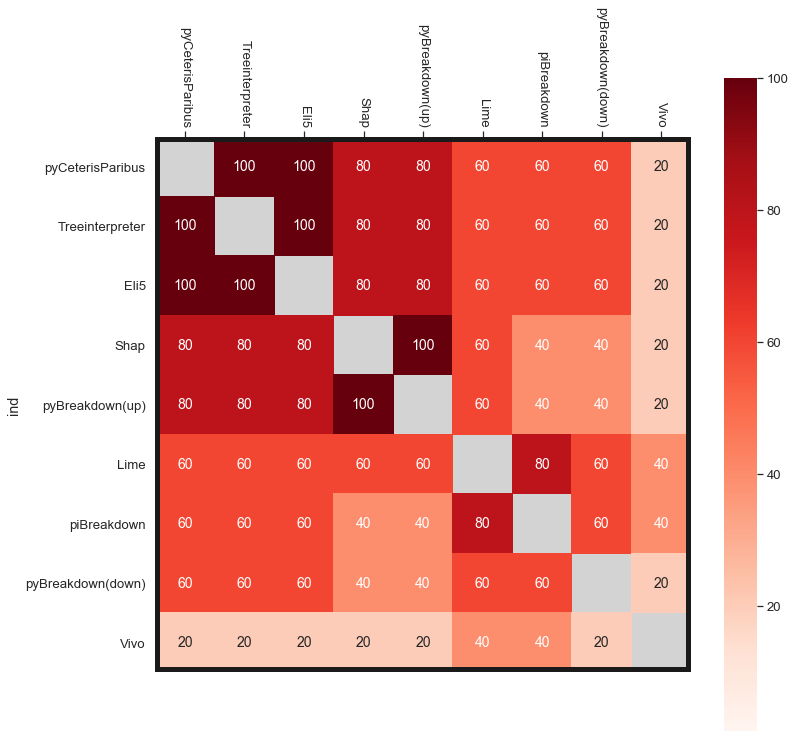

In [67]:
#new_data = pd.read_csv("./Finaltop5ofAllPrograms_150fraud.csv",sep=',')
#print(new_data)
new_data = newdfnonfraud
cols = new_data.columns
#s_cols = cols.sort_values()
#new_data = data[s_cols]
print(new_data)

#newdf1 = pd.DataFrame(columns = s_cols)
newdf1 = pd.DataFrame(columns = cols)
#newdf1['ind'] = s_cols
newdf1['ind'] = cols
newdf7 = newdf1.set_index('ind')


#for i in range(0,len(new_data.columns)):
for i in range(0,len(new_data.columns)):
    inner = new_data.columns[i+1:]
    if len(inner) != 0:
        for j in range(i+1,len(new_data.columns)):        
            intersect = len(pd.Index(new_data[new_data.columns[i]]).intersection(pd.Index(new_data[new_data.columns[j]])))
            perc = (intersect*100)/5
            newdf7[str(new_data.columns[j])][str(new_data.columns[i])] = perc
            newdf7[str(new_data.columns[i])][str(new_data.columns[j])] = perc

            
        for k in range(len(new_data.columns[:-1])):
            intersect = len(pd.Index(new_data[new_data.columns[i]]).intersection(pd.Index(new_data[new_data.columns[j]])))
            perc = int((intersect*100)/5)
            newdf7[str(new_data.columns[j])][str(new_data.columns[i])] = perc
            newdf7[str(new_data.columns[i])][str(new_data.columns[j])] = perc
               

newdf7 = newdf7.fillna(1)
newdf7.astype('int64')
print(newdf7)


import seaborn as sn
import matplotlib.pyplot as plt

sn.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,12))
ax.set_facecolor("lightgrey")
sn.heatmap(newdf7,annot=True, square=True, ax=ax,robust=True, cmap ="Reds", annot_kws={"fontsize":14},fmt='g',mask=newdf7== 1)
ax.xaxis.set_ticks_position('top')
plt.setp(ax.get_yticklabels(), rotation=360)

ax.axhline(y=0, color='k',linewidth=10)
ax.axhline(y=newdf7.shape[1], color='k',linewidth=10)
ax.axvline(x=0, color='k',linewidth=10)
ax.axvline(x=newdf7.shape[0], color='k',linewidth=10)
b, t = plt.ylim()
b += 0.5
t -= 0.5 
plt.ylim(b, t)
plt.xticks(rotation=270)
plt.savefig('Heatmap_nonfraud_localmethods_150instances.png')
plt.show()

